<a href="https://colab.research.google.com/github/egreven/CS506-Fall2021/blob/master/Homework_2_CS_506_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Problem 1.a
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
x_coor_class1 = [np.random.uniform(-4, 4) for x in range(50)]
y_coor_class1 = [np.random.uniform(-4, x-1) for x in x_coor_class1]




x_coor_class2 = [np.random.uniform(-4, 4) for x in range(50)]
y_coor_class2 = [np.random.uniform(x+1, 4) for x in x_coor_class2]

x_outlier_coor_class1 = [np.random.uniform(6, 9) for x in range(10)]
y_outlier_coor_class1 = [np.random.uniform(-5, -8) for y in range(10)]


In [3]:
# Linear Regression Least Squares

# WITHOUT OUTLIERS
X_without_outliers_LinR = np.array(x_coor_class1 + x_coor_class2).reshape(-1, 1)
Y_without_outliers_LinR = np.array(y_coor_class1+y_coor_class2).reshape(-1,1)


w = np.linalg.lstsq(X_without_outliers_LinR, Y_without_outliers_LinR, rcond=None)

w = w[0][0][0]


# WITH OUTLIERS
X_with_outliers_LinR = np.array(x_coor_class1 + x_coor_class2 + x_outlier_coor_class1).reshape(-1, 1)
Y_with_outliers_LinR = np.array(y_coor_class1+y_coor_class2 + y_outlier_coor_class1).reshape(-1,1)


w_with_outliers = np.linalg.lstsq(X_with_outliers_LinR, Y_with_outliers_LinR, rcond=None)

w_with_outliers = w_with_outliers[0][0][0]

print(w, w_with_outliers)
# minmax_classX_LinR = min_max_scaler.fit_transform(data_without_outliers_classX_LinR)
# minmax_classY_LinR = min_max_scaler.fit_transform(data_without_outliers_classY_LinR)

# modelLinR.fit(minmax_classX_LinR, minmax_classY_LinR )
# modelLinR.predict(minmax_classX_LinR)

# modelLinR.fit(data_without_outliers_classX_LinR, data_without_outliers_classY_LinR )
# modelLinR.predict(data_without_outliers_classX_LinR)


0.5194499540858193 -0.21175583774623508


In [4]:
# Logistic Regression

# WITHOUT OUTLIERS i.e. no outliers -> n_o
data_without_outliers_classX = np.array(list(zip(x_coor_class1, x_coor_class2)))
data_without_outliers_classY = np.array(list(zip(y_coor_class1, y_coor_class2)))

minmax_classX_n_o = min_max_scaler.fit_transform(data_without_outliers_classX).reshape(-1,1)
minmax_classY_n_o = min_max_scaler.fit_transform(data_without_outliers_classY).reshape(-1,1)

logit_n_o = sm.Logit(minmax_classX_n_o, minmax_classY_n_o)
result_n_o = logit_n_o.fit()
result_n_o = result_n_o.predict()


# WITH OUTLIERS i.e. yes outliers -> y_o
data_with_outliers_classX = np.array(x_coor_class1 + x_coor_class2 + x_outlier_coor_class1).reshape(-1,1)
data_with_outliers_classY = np.array(y_coor_class1 + y_coor_class2 + y_outlier_coor_class1).reshape(-1,1)

minmax_classX_y_o = min_max_scaler.fit_transform(data_with_outliers_classX).reshape(-1,1)
minmax_classY_y_o = min_max_scaler.fit_transform(data_with_outliers_classY).reshape(-1,1)

logit_y_o = sm.Logit(minmax_classX_y_o, minmax_classY_y_o)
result_y_o = logit_y_o.fit()
result_y_o = result_y_o.predict()


Optimization terminated successfully.
         Current function value: 0.655371
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.638522
         Iterations 4


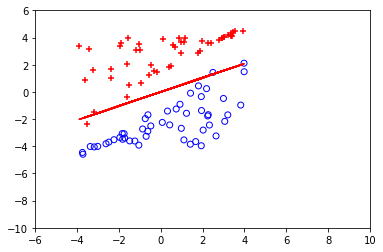

In [5]:

#plt.figure(figsize=(10,10))
plt.scatter(x_coor_class1, y_coor_class1, facecolors='none', edgecolors='b')
plt.scatter(x_coor_class2, y_coor_class2, c="r", marker="+")

plt.plot(np.array(x_coor_class1 + x_coor_class2), w*np.array(x_coor_class1 + x_coor_class2), c='red')

# PLOT DATA WITHOUT OUTLIERS LOGISTIC
plt.xlim(-6, 10)
plt.ylim(-10,6)

plt.show()

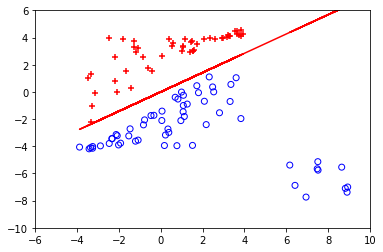

In [8]:
plt.scatter(x_coor_class1, y_coor_class1, facecolors='none', edgecolors='b')
plt.scatter(x_coor_class2, y_coor_class2, c="r", marker="+")
plt.scatter(x_outlier_coor_class1, y_outlier_coor_class1, facecolors='none', edgecolors='b')

plt.plot(np.array(x_coor_class1 + x_coor_class2 + x_outlier_coor_class1), w*np.array(x_coor_class1 + x_coor_class2 + x_outlier_coor_class1), c='red')



# PLOT DATA WITH OUTLIERS LOGISTIC
# plt.plot(np.array(x_coor_class1 + x_coor_class2 + x_outlier_coor_class1), result_y_o )


plt.xlim(-6, 10)
plt.ylim(-10,6)

plt.show()

1.c. Linear Regression is directly impacted because the outliers shift the least squares line significantly because of the large redisual value that they generate. 

Logistic regression is not sensitive to outliers because the outliers are far away from the decision boundary they have less affect on the line and in this case they are closer to the bottom of the line (or 0 probability).

# Problem 2

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
data = np.load('/content/drive/MyDrive/Colab Notebooks/mnist_data.npy')
labels = np.load('/content/drive/MyDrive/Colab Notebooks/mnist_labels.npy')

In [11]:
# Split training set into training and testing set
X_train, X_test, y_train, y_test  = train_test_split(
        data,
        labels,
        test_size=0.20
    )


In [12]:
minmax_X_train = min_max_scaler.fit_transform(X_train).reshape(-1,1)
minmax_y_train = min_max_scaler.fit_transform(y_train.reshape(-1,1)).reshape(-1,1)

# USE SKLEARN model.score(input) -- accuracy score 

logit_model = sm.MNLogit(y_train, X_train)

result = logit_model.fit()

y_pred = result.predict(X_test)

/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:2195: RuntimeWarning: overflow encountered in exp
  eXB = np.column_stack((np.ones(len(X)), np.exp(X)))
/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:2196: RuntimeWarning: invalid value encountered in true_divide
  return eXB/eXB.sum(1)[:,None]


Optimization terminated successfully.
         Current function value: nan
         Iterations 4


In [13]:
# precision = metrics.precision_score(y_test, y_pred)

# classification_report( y_pred, y_test)

accuracy_score = accuracy_score(y_test, y_pred)

ValueError: ignored

In [14]:
print(len(X_train))

14400


In [ ]:
# Problem 2.c.

nreps = 5
kvals = [1,3,5,7,9,11,13,15,17,19,21,23,25]
acc = []
np.random.seed(4)
Data_train, Data_test, labels_train, labels_test = train_test_split(data, 
                                                                            labels, 
        # USE SPLIT FROM PREV QUESTION                                                               train_size = 0.5,
                                                                            test_size = 0.2)
for k in kvals:
    test_rep = []
    train_rep = []
    # for n in range(nreps):
        
    knn = KNeighborsClassifier(n_neighbors = k)    
    knn.fit(Data_train, labels_train)
    train_rep.append(knn.score(Data_train, labels_train))
    test_rep.append(knn.score(Data_test, labels_test))
    acc.append([np.mean(np.array(test_rep)), np.mean(np.array(train_rep))])
accy = np.array(acc)

In [ ]:
print(accy[:,1])
print(len(kvals))

In [ ]:
plt.plot(kvals, accy[:, 0], '.-', label = 'Accuracy on Test Data')
plt.plot(kvals, accy[:, 1], '.-', label = 'Accuracy on Training Data')
plt.xlabel(r'$k$')
plt.ylabel('Accuracy')
plt.title('Train/Test Comparision of $k$-NN')
plt.legend(loc = 'best');

### 2.d. Explain your results


In [ ]:
# Problem 2.e. 
test_values = [5.0/6.0, 2.0/3.0, 0.5, 1.0/3.0, 0.20]
train_size = [3000, 6000, 9000, 12000, 14400]

nreps2 = 25
k = 15
# 3000     test size = 5.0/ 6.0

# 6000     test size = 2.0 / 3.0

# 9000     test size = 0.5

# 12000    test size = 1.0 / 3.0

# 14400    test size = 0.20

# Using k = 15
# for test_val in test_values:
#     test_rep2 = []
#     train_rep2 = []
#     for i in range(nreps2):
#         Data_train2, Data_test2, labels_train2, labels_test2 = train_test_split(data, 
#                                                                             labels, 
#                                                                             test_size = test_val)
#         knn2 = KNeighborsClassifier(n_neighbors = 15)    
#         knn2.fit(Data_train2, labels_train2)
#         train_rep2.append(knn.score(Data_train2, labels_train2))
#         test_rep2.append(knn.score(Data_test2, labels_test2))
#     acc2.append([np.mean(np.array(test_rep2)), np.mean(np.array(train_rep2))])
# accy2 = np.array(acc2)


def test_knn(kval, test_fraction, nreps):
    acc = []
    std = []
    np.random.seed(0)
    #
    
    test_rep = []
    train_rep = []
    running_time = 0 # INITIAL TIME
    for i in range(nreps):
        X_train, X_test, y_train, y_test = model_selection.train_test_split(
            data, labels, test_size = test_fraction)
        knn = KNeighborsClassifier(n_neighbors = kval)    
        knn.fit(X_train, y_train)
        test_rep.append(knn.score(X_test, y_test))
    acc.append(np.mean(np.array(test_rep)))
    std.append(np.std(np.array(test_rep)))
    return(np.array(acc), np.array(std)/np.sqrt(nreps))

test_fraction1 = 5.0 / 6.0
accy1, stds1 = test_knn(k, test_fraction1, 25)

test_fraction2 = 2.0/3.0
accy2, stds2 = test_knn(k, test_fraction2, 25)

test_fraction3 = 0.5
accy3, stds3 = test_knn(k, test_fraction3, 25)

test_fraction4 = 1.0/3.0
accy4, stds4 = test_knn(k, test_fraction4, 25)

test_fraction5 = 0.20
accy5, stds5 = test_knn(k, test_fraction5, 25)




In [ ]:
print(accy2[:, 1])

### Problem 2. F. Give a few bullet points explaining the pros and cons of these algorithms and when and why we use logistic regression over linear regression.

The more data used for training, the better the classifier will tend to perform
The less data used for testing, the more variable will be the testing results (but the faster testing will go)


#### Linear Regression:

In linear regression Maximum Likelihood Estimation of a and b can be found by a closed-form calculation

Pros: 
- linear regression It is a form of supervised learning: whereas classification deals with predicting categorical features (labels or classes), regression deals with predicting continuous features (real values).
- less complex and easier to interpret 

Cons:
- Linear functions (a + bx) cannot be used to predict probability directly, because the linear function takes on all values from negative infinity to positive infinity and probability only ranges over (0, 1)
- outliers have a big effect on the boundary line
- assumes independence between attributes and linear relationship among the variables

#### Logistic Regression:

So the key properties of a problem that make it appropriate for logistic regression are:

- What you can observe is a categorical variable
- What you want to estimate is a probability of seeing a particular value of the categorical variable.

In logistic regression we use Maximum Likelihood of the parameters, i.e. we choose the parameter values that maximize the likelihood of the data given the model. Can maximize the likelihood function by various kinds of gradient descent.


Pros:
- Logistic regression can also be considered classification because we can use the probability to determine which group data items belong in or should be classified.
- can fit linear functions: to fit a linear function, instead of using odds (p / (1-p) ), we should use log-odds i.e. log (p/(1-p))
- independent and dependent variables are related linearly

Cons: 
- overfitting can occur when the number of features is greater than observations
- makes boundaries based on lines
- can only predict discrete functions
- does not perform well with collinearity 




We use logistic regression over linear regression because it is less susceptible to outliers, also can fit linear functions, and it can classify and perform regression. 

In [ ]:
plt.plot(train_size, accy1[:, 0], '.-', label = 'Accuracy on Test Data')
plt.plot(train_size, accy1[:, 1], '.-', label = 'Accuracy on Training Data')
plt.plot(train_size, accy2[:, 0], '.-', label = 'Accuracy on Test Data')
plt.plot(train_size, accy2[:, 1], '.-', label = 'Accuracy on Training Data')
plt.plot(train_size, accy3[:, 0], '.-', label = 'Accuracy on Test Data')
plt.plot(train_size, accy3[:, 1], '.-', label = 'Accuracy on Training Data')
plt.plot(train_size, accy4[:, 0], '.-', label = 'Accuracy on Test Data')
plt.plot(train_size, accy4[:, 1], '.-', label = 'Accuracy on Training Data')
plt.plot(train_size, accy5[:, 0], '.-', label = 'Accuracy on Test Data')
plt.plot(train_size, accy5[:, 1], '.-', label = 'Accuracy on Training Data')


plt.xlabel(r'Training Size')
plt.ylabel('Accuracy')
plt.title('Train/Test Comparision of $k$-NN')
plt.legend(loc = 'best');


# plt.figure(figsize = (7, 5))
# plt.errorbar(kvals, accy1, stds1, 
#              label = f'{test_fraction1:.0%} Used for Testing; accuracy {np.max(accy1):.03f}')
# plt.errorbar(kvals, accy2, stds2, 
#              label = f'{test_fraction2:.0%} Used for Testing; accuracy {np.max(accy2):.03f}')
# plt.errorbar(kvals, accy3, stds3, 
#              label = f'{test_fraction3:.0%} Used for Testing; accuracy {np.max(accy3):.03f}')
# plt.errorbar(kvals, accy4, stds4, 
#              label = f'{test_fraction4:.0%} Used for Testing; accuracy {np.max(accy4):.03f}')
# plt.errorbar(kvals, accy5, stds5, 
#              label = f'{test_fraction5:.0%} Used for Testing; accuracy {np.max(accy5):.03f}')



# plt.xlabel('k')
# plt.ylabel('Accuracy')
# plt.legend(loc = 'best')
# plt.xticks(kvals)
# best_k = kvals[np.argmax(accy1)]
# plt.title(f'Test Accuracy with $\pm 1\sigma$ Error Bars');

In [24]:
# PROBLEM 3.1
from sklearn.preprocessing import StandardScaler

data_train3, data_test3, labels_train3, labels_test3 = train_test_split(
    data, labels, test_size = 0.20
)

print(data_train3.shape)
scaler = StandardScaler()
# Fit on training set
scaler.fit(data_train3)

data_train3 = scaler.transform(data_train3)

print(data_test3.shape)
data_test3 = scaler.transform(data_test3)

(14400, 784)
(3600, 784)


In [29]:
from sklearn.decomposition import PCA

# model instance of 100% features
pca = PCA()


pca.fit(data_train3)

extra_data_train3 = pca.fit(data_train3)
data_train3 = pca.transform(data_train3)
data_test3 = pca.transform(data_test3)


# part 1 3d. increment data
# part 2 try different component numbers data_train3 = pca.transform(data_train3)

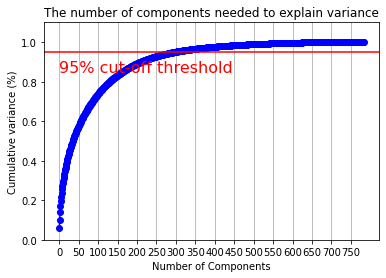

0.9501302783167722
Number of components to reach 95% variance is 297


In [41]:
# PROBLEM 3.b
# HOW TO GET Coefficient of Determination of explain variance 
# from cumsum of explained variance ratio????????




# code to plot figure taken from here: 
#https://www.mikulskibartosz.name/pca-how-to-choose-the-number-of-components/

fig, ax = plt.subplots()
xi = np.arange(0, 784, step=1)
y = np.cumsum(extra_data_train3.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 785, step=50)) 
#change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()
# PROBLEM 3.c CHOOSE NUMBER OF COMPONENTS
print(y[297])
print("Number of components to reach 95% variance is 297")

In [ ]:
# train KNN classifier


nreps = 5
k = 15 # CHANGE AS 2C FINISHES
acc = []
np.random.seed(4)

test_rep = []
train_rep = []
for n in range(nreps):
    Data_train, Data_test, labels_train, labels_test = train_test_split(data, 
                                                                        labels, 
                                                                        train_size = 0.5,
                                                                        test_size = 0.2)
    knn = KNeighborsClassifier(n_neighbors = k)    
    knn.fit(Data_train, labels_train)
    train_rep.append(knn.score(Data_train, labels_train))
    test_rep.append(knn.score(Data_test, labels_test))
acc.append([np.mean(np.array(test_rep)), np.mean(np.array(train_rep))])
accy = np.array(acc)


print(accy[:, 0], 'Accuracy on Test Data')
print(accy[:, 1], 'Accuracy on Training Data')




In [ ]:
# PROBLEM 3.d.

# You can make two different plots for 3d, in which case time is on the y-axis 
#   for each plot. Or, you can make one plot with time on the x-axis, and two 
#   different y-scales (on the left and right axes) for # components and dataset 
#   size. The second option is more complex to plot.



# Describe the plot. What seems to affect -as a trend- the fitting time more? 
#  Number of samples used for trying, or the dimensions of the data?

In [ ]:
# PROBLEM 3.e.

In [ ]:
# PROBLEM 3.f.